<a href="https://colab.research.google.com/github/Saisidd07/Flowbattery_ML/blob/main/01_flowbattery_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import


In [56]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

Data Processing


In [9]:
file_name="flowbattery_data.xlsx"
df = pd.read_excel(file_name,'Channel_1-008')

In [10]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg),Temperature (C)_1
0,1,5.011723,2021-03-11 16:54:34,5.011723,1,1,0.0,-0.001083,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,20.703896
1,2,10.021346,2021-03-11 16:54:39,10.021346,1,1,0.0,-0.001083,0.0,0.0,0.0,0.0,0.001467,0,0,0,0,20.553991
2,3,15.029085,2021-03-11 16:54:44,15.029085,1,1,0.0,-0.001083,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,20.764845
3,4,20.034541,2021-03-11 16:54:49,20.034542,1,1,0.0,-0.000920,0.0,0.0,0.0,0.0,0.001494,0,0,0,0,20.614960
4,5,25.042132,2021-03-11 16:54:54,25.042132,1,1,0.0,-0.001083,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,20.584475


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data_Point                29145 non-null  int64         
 1   Test_Time(s)              29145 non-null  float64       
 2   Date_Time                 29145 non-null  datetime64[ns]
 3   Step_Time(s)              29145 non-null  float64       
 4   Step_Index                29145 non-null  int64         
 5   Cycle_Index               29145 non-null  int64         
 6   Current(A)                29145 non-null  float64       
 7   Voltage(V)                29145 non-null  float64       
 8   Charge_Capacity(Ah)       29145 non-null  float64       
 9   Discharge_Capacity(Ah)    29145 non-null  float64       
 10  Charge_Energy(Wh)         29145 non-null  float64       
 11  Discharge_Energy(Wh)      29145 non-null  float64       
 12  dV/dt(V/s)        

In [12]:
df.isnull().sum()

,0
Data_Point,0
Test_Time(s),0
Date_Time,0
Step_Time(s),0
Step_Index,0
Cycle_Index,0
Current(A),0
Voltage(V),0
Charge_Capacity(Ah),0
Discharge_Capacity(Ah),0


In [13]:
df=df[df['Discharge_Energy(Wh)']!=0]

In [14]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg),Temperature (C)_1
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,0,0,0,0,19.602539
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,0,0,0,0,19.752750
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,0,0,0,0,19.677650
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,0,0,0,0,19.377134
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,0,0,0,0,19.301975


In [17]:
df.head()


,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg),Temperature (C)_1
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,0,0,0,0,19.602539
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,0,0,0,0,19.752750
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,0,0,0,0,19.677650
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,0,0,0,0,19.377134
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,0,0,0,0,19.301975


In [18]:
df=df.drop(columns=['Internal_Resistance(Ohm)','Is_FC_Data','ACI_Phase_Angle(Deg)','AC_Impedance(Ohm)'])

In [19]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Temperature (C)_1
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,19.602539
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,19.752750
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,19.677650
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,19.377134
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,19.301975


In [20]:
df['Charge_Capacity(Ah)'].value_counts().sum()


13597

In [21]:
num=df.size
print(f"the number of values after filtering out most in the dataset is about{num}")

the number of values after filtering out most in the dataset is about190358


In [22]:
df=df[(df['Charge_Capacity(Ah)']!=0) & (df['Discharge_Energy(Wh)']!=0) & (df['Charge_Energy(Wh)']!=0)]

In [23]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Temperature (C)_1
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,19.602539
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,19.752750
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,19.677650
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,19.377134
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,19.301975


In [24]:
df.size

190358

In [25]:
df['CE']=df['Discharge_Capacity(Ah)']/df['Charge_Capacity(Ah)']
df['Average_Discharge']=df['Discharge_Energy(Wh)']/df['Discharge_Capacity(Ah)']
df['Average_Charge']=df['Charge_Energy(Wh)']/df['Charge_Capacity(Ah)']
df['VE']=df['Average_Discharge']/df['Average_Charge']
df['EE']=df['Discharge_Energy(Wh)']/df['Charge_Energy(Wh)']

In [26]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Temperature (C)_1,CE,Average_Discharge,Average_Charge,VE,EE
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,19.602539,0.000001,1.523699,1.436104,1.060995,0.000001
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,19.752750,0.000298,1.517329,1.436104,1.056559,0.000315
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,19.677650,0.001548,1.509124,1.436104,1.050846,0.001627
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,19.377134,0.002799,1.506695,1.436104,1.049154,0.002937
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,19.301975,0.004050,1.505258,1.436104,1.048154,0.004245


In [27]:
df_2=df.copy()

In [28]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Temperature (C)_1,CE,Average_Discharge,Average_Charge,VE,EE
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,19.602539,0.000001,1.523699,1.436104,1.060995,0.000001
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,19.752750,0.000298,1.517329,1.436104,1.056559,0.000315
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,19.677650,0.001548,1.509124,1.436104,1.050846,0.001627
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,19.377134,0.002799,1.506695,1.436104,1.049154,0.002937
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,19.301975,0.004050,1.505258,1.436104,1.048154,0.004245


In [29]:
df_2=df_2.drop(columns=['Date_Time','Test_Time(s)','Step_Time(s)','Step_Index','Cycle_Index','dV/dt(V/s)'])

In [30]:
df.head()

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Temperature (C)_1,CE,Average_Discharge,Average_Charge,VE,EE
5022,5023,12117.515003,2021-03-11 20:16:27,0.015685,4,1,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,-0.016302,19.602539,0.000001,1.523699,1.436104,1.060995,0.000001
5023,5024,12121.071719,2021-03-11 20:16:31,3.572402,4,1,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,-0.010470,19.752750,0.000298,1.517329,1.436104,1.056559,0.000315
5024,5025,12136.078828,2021-03-11 20:16:46,18.579511,4,1,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,-0.007461,19.677650,0.001548,1.509124,1.436104,1.050846,0.001627
5025,5026,12151.086166,2021-03-11 20:17:01,33.586848,4,1,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,-0.005954,19.377134,0.002799,1.506695,1.436104,1.049154,0.002937
5026,5027,12166.093060,2021-03-11 20:17:16,48.593743,4,1,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,-0.005970,19.301975,0.004050,1.505258,1.436104,1.048154,0.004245


In [31]:
df_2.head()

,Data_Point,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),Temperature (C)_1,CE,Average_Discharge,Average_Charge,VE,EE
5022,5023,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,19.602539,0.000001,1.523699,1.436104,1.060995,0.000001
5023,5024,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,19.752750,0.000298,1.517329,1.436104,1.056559,0.000315
5024,5025,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,19.677650,0.001548,1.509124,1.436104,1.050846,0.001627
5025,5026,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,19.377134,0.002799,1.506695,1.436104,1.049154,0.002937
5026,5027,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,19.301975,0.004050,1.505258,1.436104,1.048154,0.004245


In [32]:
X=df_2.drop(columns=['CE','EE','VE'])
y=df_2[['CE','VE','EE']]

In [33]:
X.head()

,Data_Point,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),Temperature (C)_1,Average_Discharge,Average_Charge
5022,5023,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,19.602539,1.523699,1.436104
5023,5024,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,19.752750,1.517329,1.436104
5024,5025,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,19.677650,1.509124,1.436104
5025,5026,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,19.377134,1.506695,1.436104
5026,5027,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,19.301975,1.505258,1.436104


In [34]:
y.head()

,CE,VE,EE
5022,0.000001,1.060995,0.000001
5023,0.000298,1.056559,0.000315
5024,0.001548,1.050846,0.001627
5025,0.002799,1.049154,0.002937
5026,0.004050,1.048154,0.004245


In [35]:
X


,Data_Point,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),Temperature (C)_1,Average_Discharge,Average_Charge
5022,5023,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,19.602539,1.523699,1.436104
5023,5024,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,19.752750,1.517329,1.436104
5024,5025,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,19.677650,1.509124,1.436104
5025,5026,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,19.377134,1.506695,1.436104
5026,5027,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,19.301975,1.505258,1.436104
...,...,...,...,...,...,...,...,...,...,...
29140,29141,-0.999979,1.242020,1.259447,0.964628,1.901491,1.280446,18.629593,1.327399,1.509783
29141,29142,-0.999979,1.240716,1.259447,0.968805,1.901491,1.285631,18.599121,1.327028,1.509783
29142,29143,-0.999945,1.239738,1.259447,0.972973,1.901491,1.290800,18.342741,1.326656,1.509783
29143,29144,-0.999945,1.238434,1.259447,0.977131,1.901491,1.295952,18.615265,1.326283,1.509783


Data Visualization

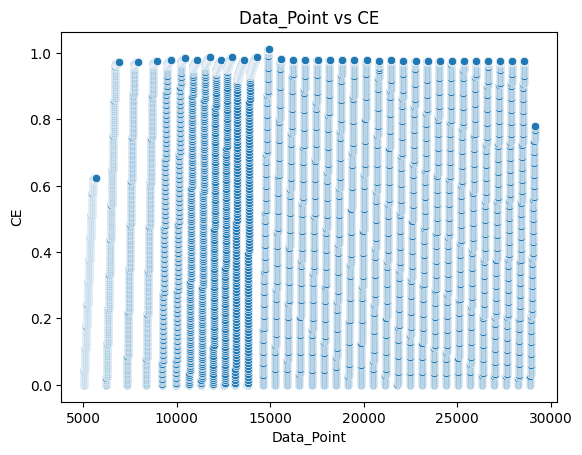

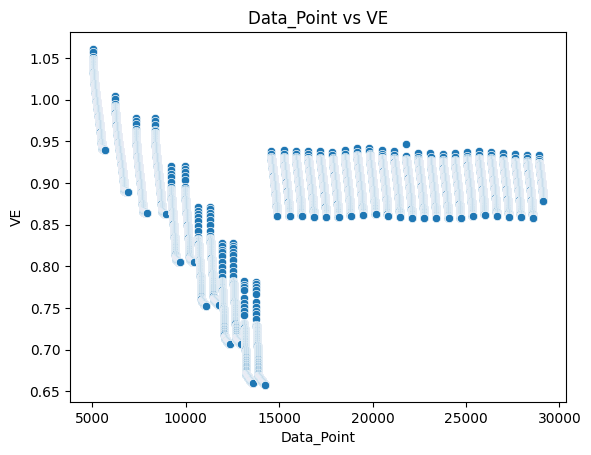

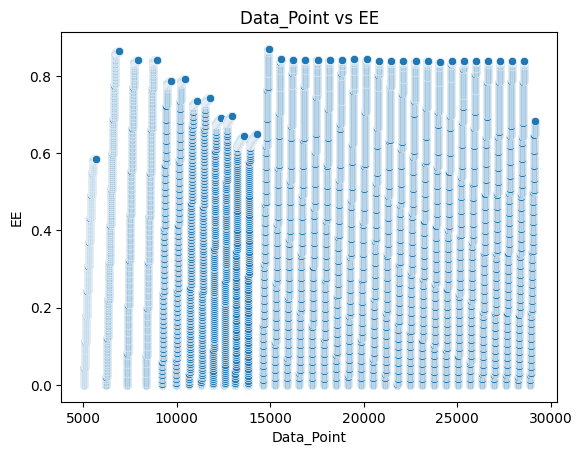

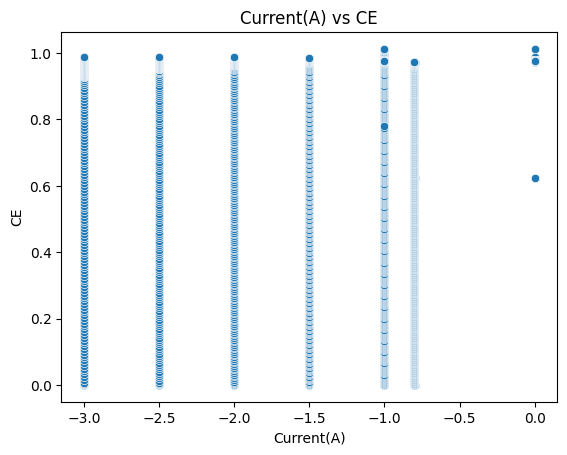

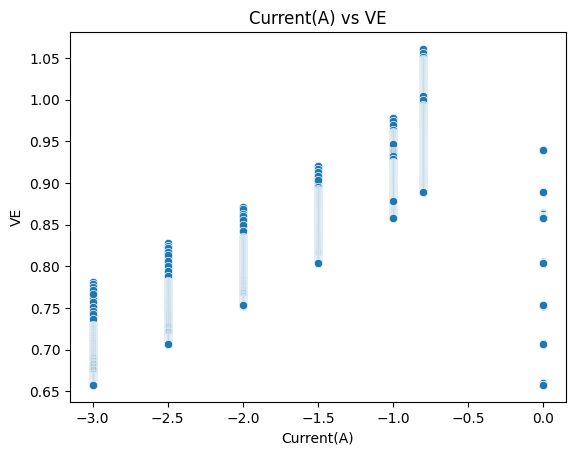

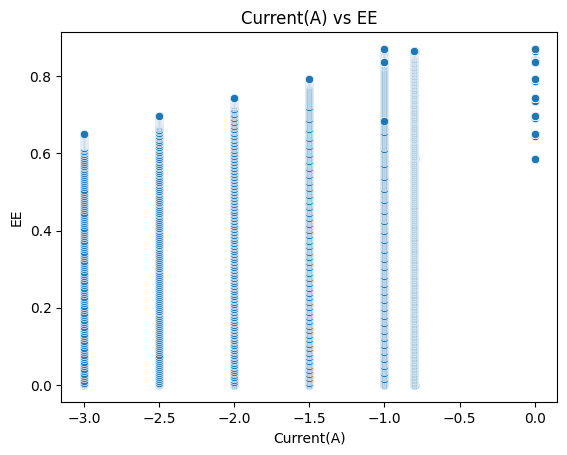

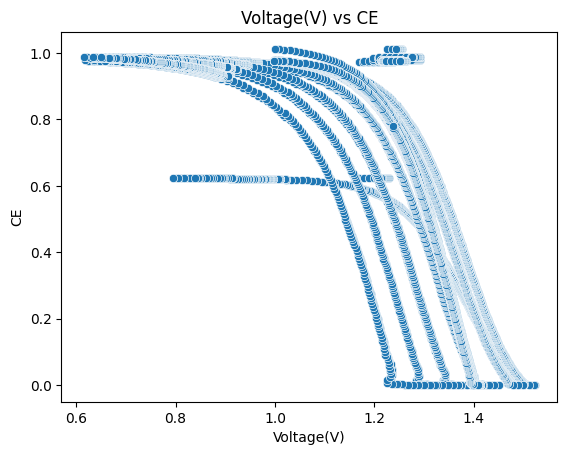

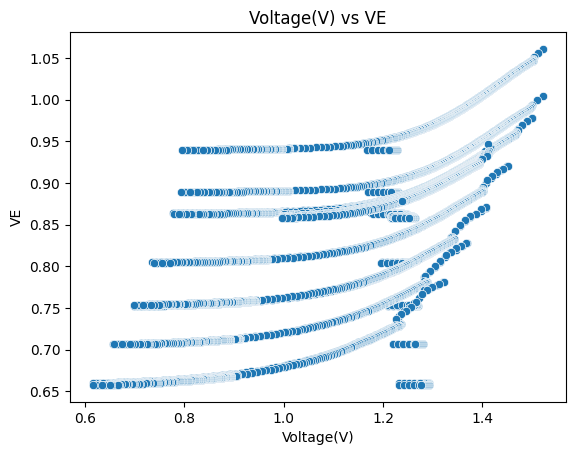

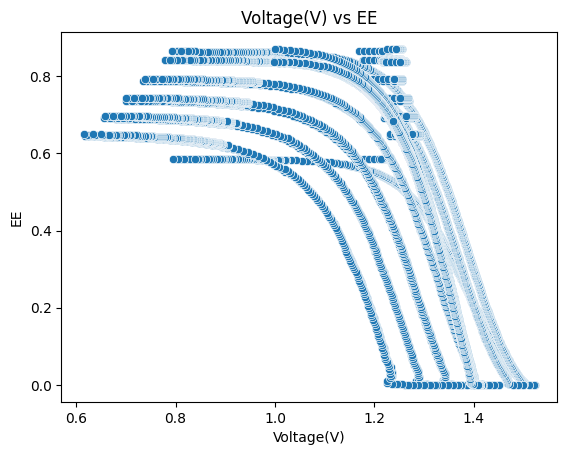

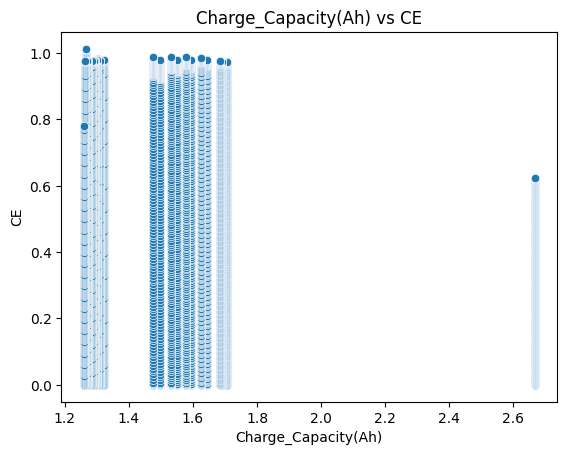

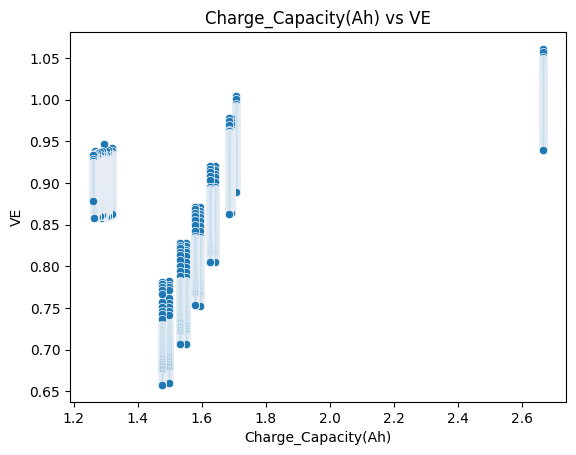

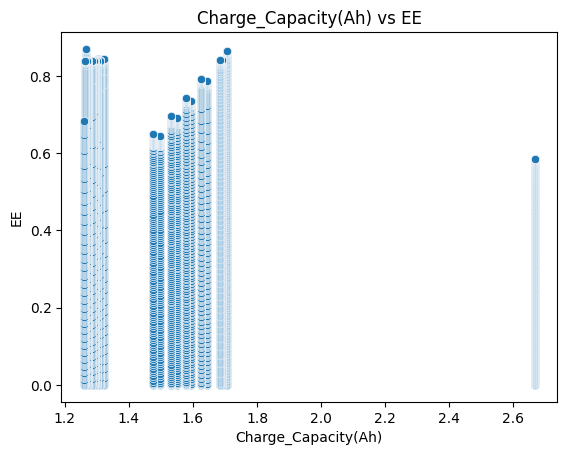

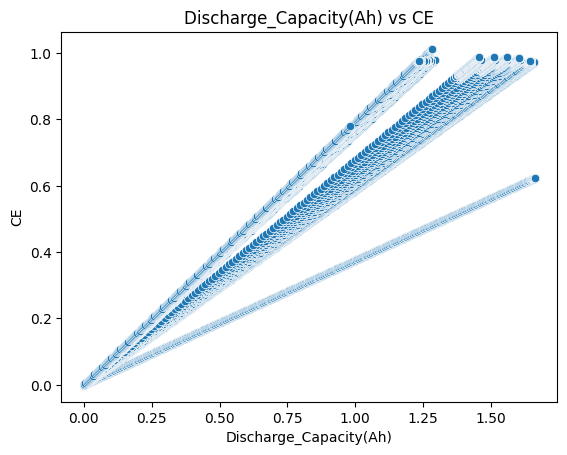

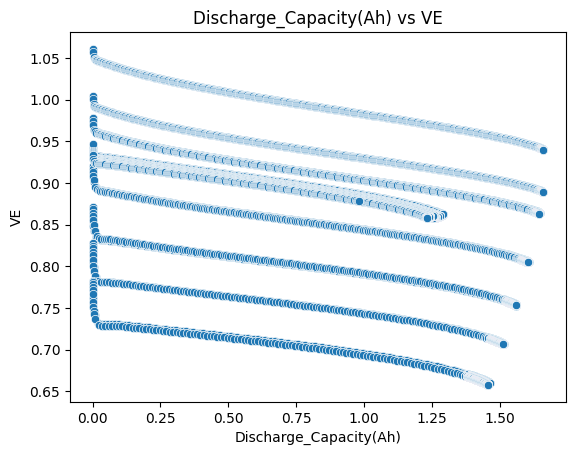

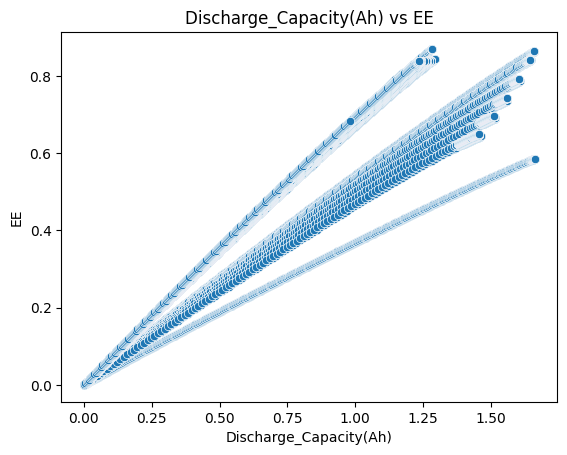

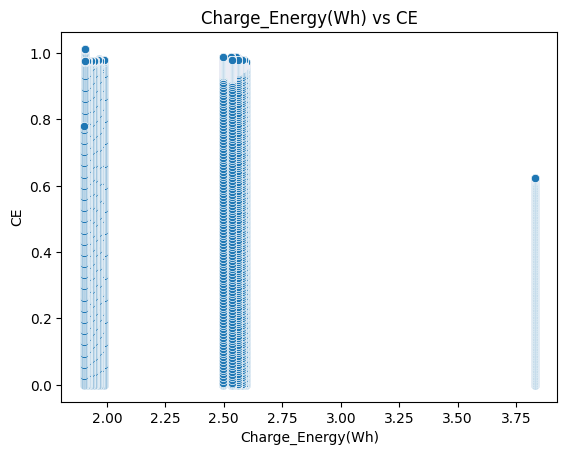

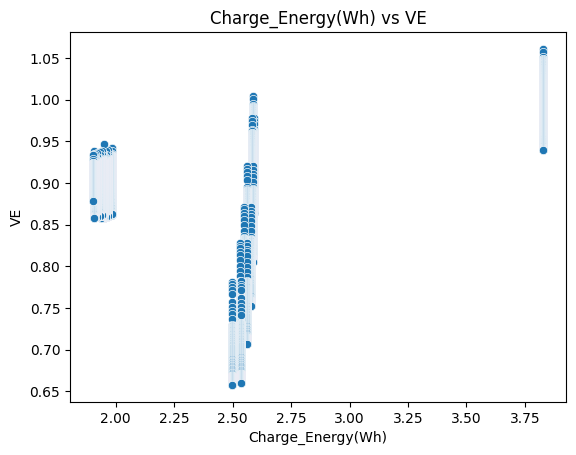

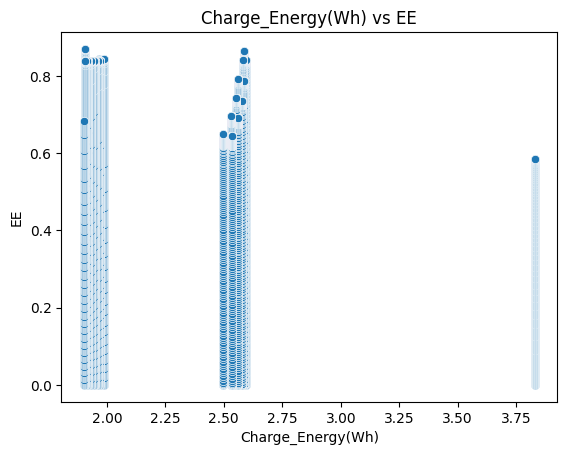

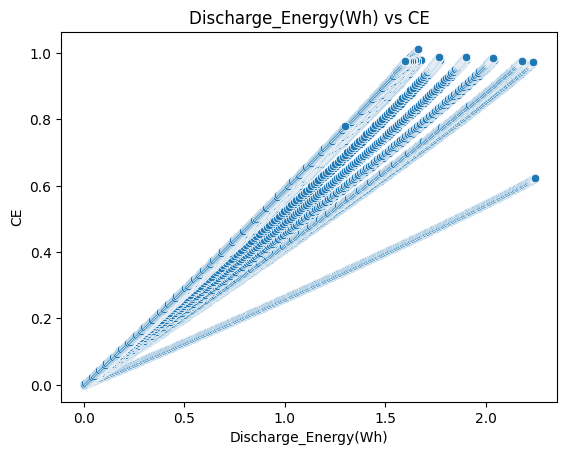

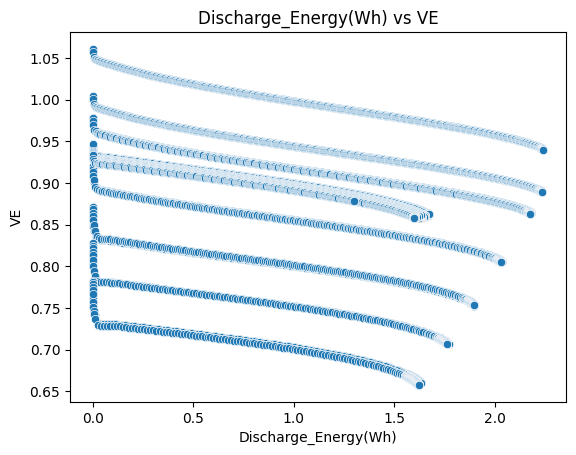

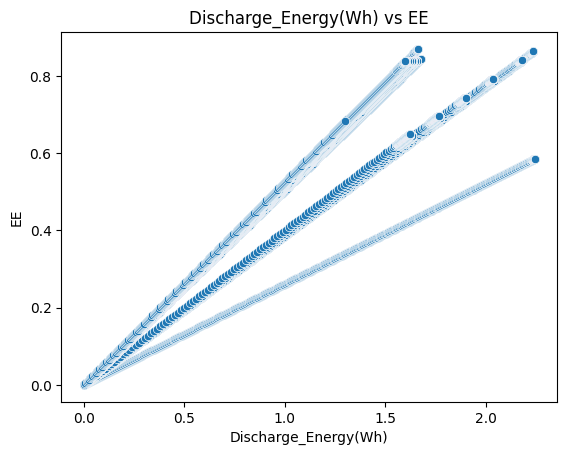

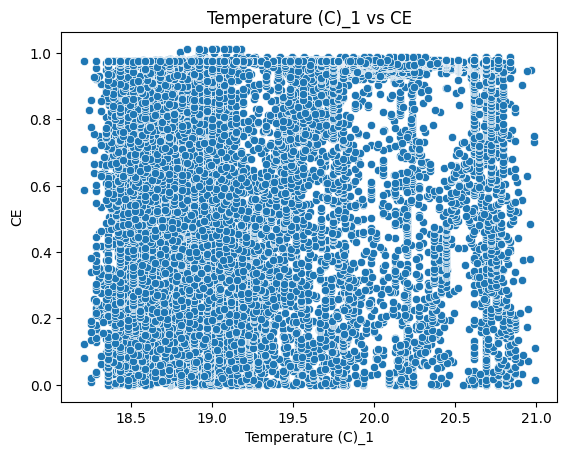

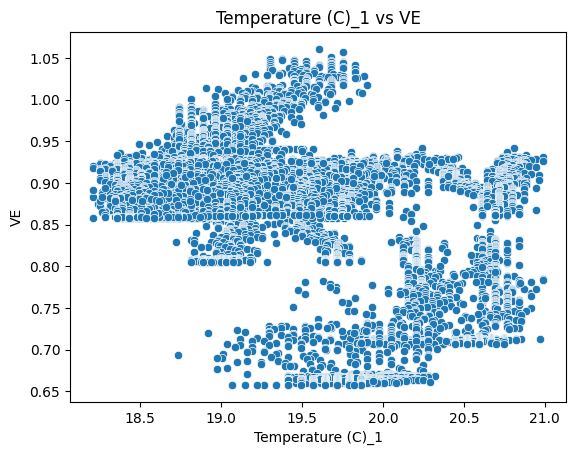

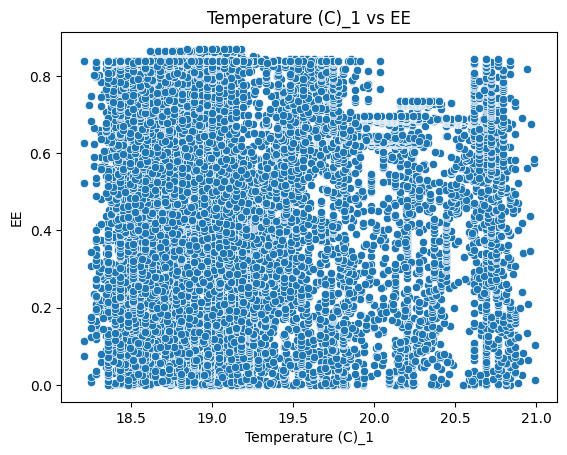

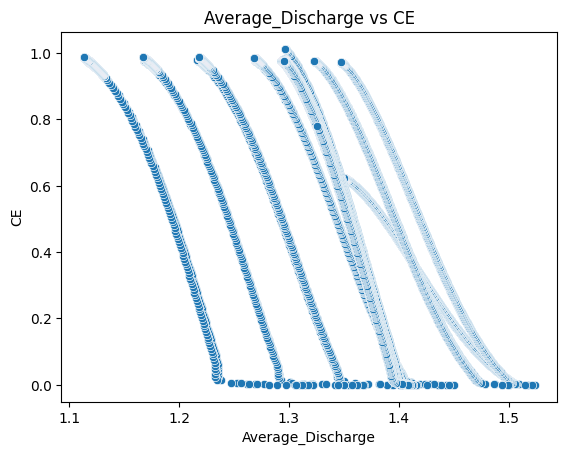

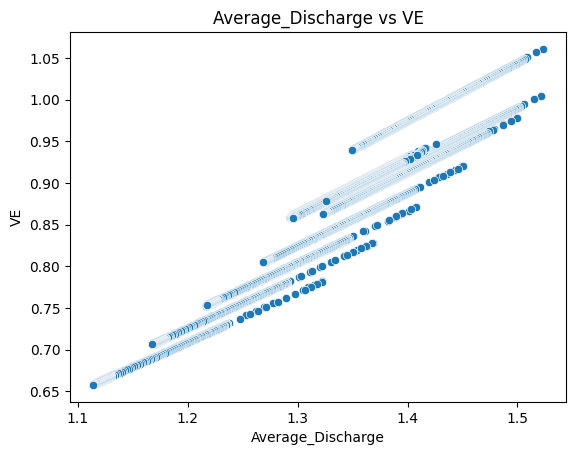

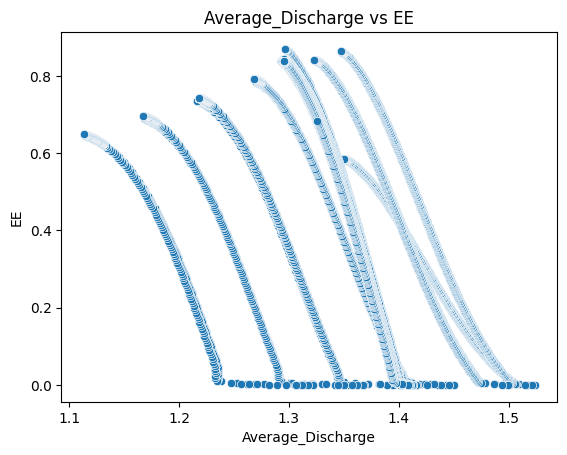

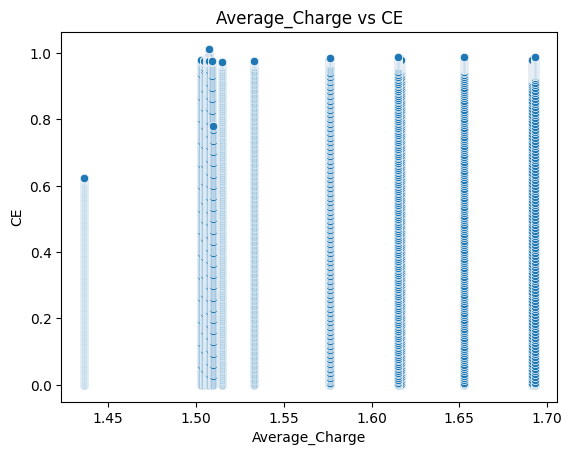

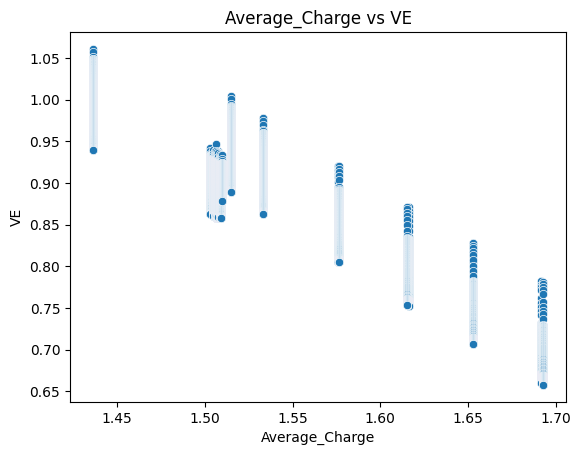

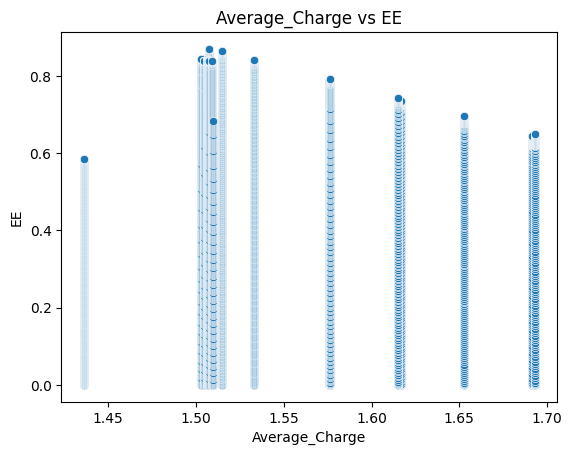

In [36]:
import seaborn as sns
for i in range(X.shape[1]):
  for j in range(y.shape[1]):
    sns.scatterplot(x=X.iloc[:,i],y=y.iloc[:,j])
    plt.title(f"{X.columns[i]} vs {y.columns[j]}")
    plt.show()

TRAIN TEST SPLIT

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X.head()

,Data_Point,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),Temperature (C)_1,Average_Discharge,Average_Charge
5022,5023,-0.799963,1.522884,2.666469,0.000003,3.829326,0.000005,19.602539,1.523699,1.436104
5023,5024,-0.799997,1.512451,2.666469,0.000794,3.829326,0.001205,19.752750,1.517329,1.436104
5024,5025,-0.799963,1.504301,2.666469,0.004129,3.829326,0.006231,19.677650,1.509124,1.436104
5025,5026,-0.799929,1.502508,2.666469,0.007463,3.829326,0.011245,19.377134,1.506695,1.436104
5026,5027,-0.799997,1.501204,2.666469,0.010798,3.829326,0.016254,19.301975,1.505258,1.436104


In [39]:
y.head()

,CE,VE,EE
5022,0.000001,1.060995,0.000001
5023,0.000298,1.056559,0.000315
5024,0.001548,1.050846,0.001627
5025,0.002799,1.049154,0.002937
5026,0.004050,1.048154,0.004245


Scaling

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Models

**Linear** **Regression**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [42]:
lr_model=MultiOutputRegressor(LinearRegression())
lr_model=lr_model.fit(X_train,y_train)


In [43]:
y_pred=lr_model.predict(X_test)

In [44]:
lr_model.score(X_test,y_test)

0.9830588180215364

Efficency

In [52]:
#evaluating efficiency separately
from sklearn.metrics import r2_score,mean_squared_error
for i in range(3):
  mse= mean_squared_error(y_test.iloc[:,i],y_pred[:,i])
  r2=r2_score(y_test.iloc[:,i],y_pred[:,i])
  print(f"metrics for {'Coloumbic' if i==0 else 'Voltaic' if i==1 else 'Energy'} Efficiency:")
  print(f"mse {mse}")
  print(f"r2 {r2}")
  print()

metrics for Coloumbic Efficiency:
mse 0.0022768330759712005
r2 0.9779180889436772

metrics for Voltaic Efficiency:
mse 1.047365506150726e-06
r2 0.9998371480352601

metrics for Energy Efficiency:
mse 0.0018405839742989371
r2 0.9714212170856719



**Neural Net**

In [46]:
import tensorflow as tf

In [47]:
normalizer=tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))


In [63]:
nn_model= tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3)
    ])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse')
hist=nn_model.fit(X_train,y_train,epochs=100 ,validation_split=0.3)

Epoch 1/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0559 - val_loss: 3.8703e-04
Epoch 2/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.0864e-04 - val_loss: 1.9021e-04
Epoch 3/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7406e-04 - val_loss: 1.3676e-04
Epoch 4/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2255e-04 - val_loss: 9.6673e-05
Epoch 5/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0328e-04 - val_loss: 7.2013e-05
Epoch 6/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2949e-05 - val_loss: 7.8327e-05
Epoch 7/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.2300e-05 - val_loss: 1.4579e-04
Epoch 8/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4175e-04 - val_loss: 9.0127e-05
Epoch 9/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.8707e-05 - val_loss: 5.5221e-05
Epoch 10/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6981e-05 - val_loss: 5.9950e-05
Epoch 11/100
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [49]:
y_train.head()

,CE,VE,EE
22017,0.693501,0.886138,0.614537
7674,0.865963,0.879794,0.761870
6314,0.176056,0.966206,0.170106
27227,0.799717,0.878120,0.702248
6349,0.244438,0.959023,0.234422


Predicted Vs Actual Values

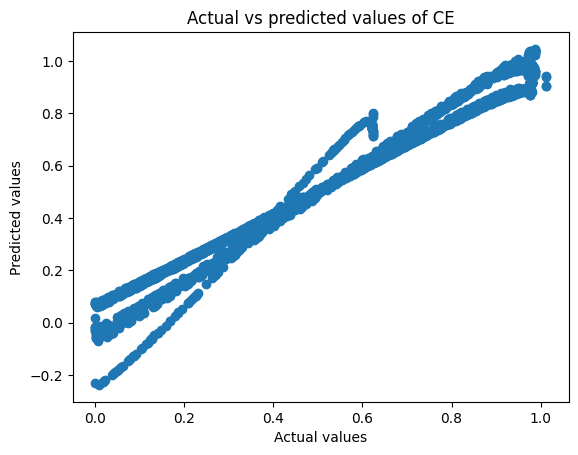

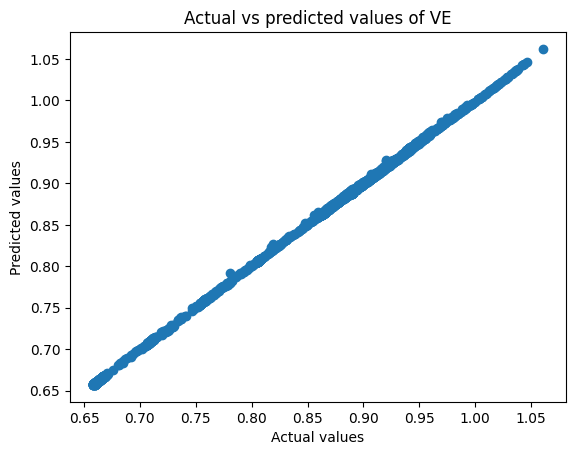

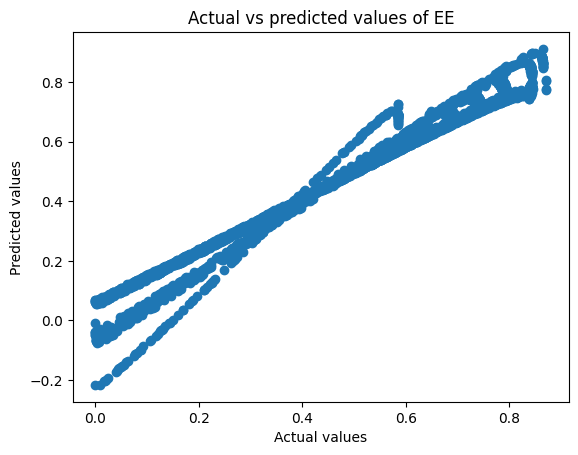

In [50]:
#predicted vs actual plot
for i,column in enumerate(y_test.columns):
  plt.figure()
  plt.scatter(y_test.iloc[:,i],y_pred[:,i])
  plt.xlabel(f"Actual values")
  plt.ylabel(f"Predicted values")
  plt.title(f"Actual vs predicted values of {column}")
  plt.show()